# Added mask mandate at bottom. Would like to run an insin() code to recreate the same scatterplots we made 1/13 but with each scatterplot being divided in 2: one with mask mandates and one without.

In [2]:
import json
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy

In [16]:
testing_sites_df =  pd.read_csv('https://raw.githubusercontent.com/dcrago/Team50_Project/main/COVID-19%20Testing%20Locations%20Symbolized%20by%20Test%20Type.csv?token=ARUSVWL2E75VLQXSQ5HVWPTAA6EAG')

In [17]:
testing_sites_df.drop(columns = ['Owner Name','Phone','Website','Operational Hours','Vehicle Capacity','CreationDate','Drive-through','Appointment Only','Referral Required','Call first','Virtual/Telehealth Screening','Local Health Department URL','Vehicle Required','Offering same-day diagnostic (not antibody) results','Offering Take-Home Test','Status Color'], inplace = True)
testing_sites_df.drop(columns = ['Public Form Submission','Minimum Age','Wheelchair accessibility ','Accessibility Support'], inplace = True)

In [19]:

testing_sites_df['county']= testing_sites_df['County']
testing_sites_df
testing_sites_df.sort_values(by ='County')


,Name of Facility,Full Address,Municipality,Owner Type,Daily Testing Capacity,Services Offered,State or Territory,County,Testing Start Date,Testing End Date,Kind of test,Processing location,Facility Type,x,y,county
8858,CHC Enfield,"5 North Main Street, Enfield, CT",Enfield,FQHC,NaN,COVID-19 testing only (no screening),Connecticut,Hartford,11/3/2020,11/3/2020,Molecular,Not Specified,Mobile/Pop-up (short-term event),-8.082311e+06,5160794.778,Hartford
6809,ALBERTSONS 184,"6560 SOUTH FEDERAL WAY, Boise ID, 83716",Boise,Private,NaN,COVID-19 screening and testing,Idaho,Ada,8/16/2020,NaN,Molecular,Offsite Lab,Retail/Pharmacy,-1.293014e+07,5394986.099,Ada
4850,Family Medicine Health Center-Kuna,"708 E Wythe Creek Ct Ste 103, Kuna, ID 83634-5005",Kuna,FQHC,NaN,COVID-19 screening and testing,Idaho,Ada,NaN,NaN,Molecular,Offsite Lab,Clinic/Health Center,-1.295815e+07,5386506.524,Ada
6802,ALBERTSONS 169,"909 EAST PARKCENTER BLVD, Boise ID, 83706",Boise,Private,NaN,COVID-19 screening and testing,Idaho,Ada,8/16/2020,NaN,Molecular,Offsite Lab,Retail/Pharmacy,-1.293219e+07,5401123.670,Ada
3895,Rite Aid/Project Baseline Testing Site,"3250 S Eagle Road Meridian, ID",Meridian,Public-Private Partnership,NaN,COVID-19 screening and testing,Idaho,Ada,NaN,NaN,Molecular,Offsite Lab,Retail/Pharmacy,-1.295245e+07,5399916.908,Ada
6798,ALBERTSONS 162,"5100 OVERLAND RD, Boise ID, 83705",Boise,Private,NaN,COVID-19 screening and testing,Idaho,Ada,8/16/2020,NaN,Molecular,Offsite Lab,Retail/Pharmacy,-1.294035e+07,5402487.569,Ada
6797,ALBERTSONS 164,"20 EAST FAIRVIEW AVE, Meridian ID, 83642",Meridian,Private,NaN,COVID-19 screening and testing,Idaho,Ada,8/16/2020,NaN,Molecular,Offsite Lab,Retail/Pharmacy,-1.295678e+07,5406929.376,Ada
662,Primary Health - Meridian Crossroads,"3280 E Lanark Dr Meridian, ID 83642",Meridian,Private,NaN,COVID-19 screening and testing,Idaho,Ada,NaN,NaN,Molecular,Lab (location not specified),Clinic/Health Center,-1.295249e+07,5404915.789,Ada
6795,ALBERTSONS 160,"10500 OVERLAND RD, Boise ID, 83709",Boise,Private,NaN,COVID-19 screening and testing,Idaho,Ada,8/16/2020,NaN,Molecular,Offsite Lab,Retail/Pharmacy,-1.294791e+07,5402210.531,Ada
6793,ALBERTSONS 154,"1520 NORTH COLE RD, Boise ID, 83704",Boise,Private,NaN,COVID-19 screening and testing,Idaho,Ada,8/16/2020,NaN,Molecular,Offsite Lab,Retail/Pharmacy,-1.294342e+07,5406538.033,Ada


In [20]:
testing_sites_df['county_states']= testing_sites_df['county'] + ' , ' + testing_sites_df['State or Territory']
testing_sites_df

,Name of Facility,Full Address,Municipality,Owner Type,Daily Testing Capacity,Services Offered,State or Territory,County,Testing Start Date,Testing End Date,Kind of test,Processing location,Facility Type,x,y,county,county_states
0,Wheeling Hospital/WVU Hospitals Offsite COVID-...,"Wheeling Park (Near Ice Rink), 1801 National R...",Wheeling,Municipal,NaN,COVID-19 testing only (no screening),West Virginia,Ohio,NaN,NaN,Molecular,Lab (location not specified),Hospital,-8.979782e+06,4874576.993,Ohio,"Ohio , West Virginia"
1,Middleton Family Medicine,"147 South Main Street Middleton, MA 01949",Middleton,Other,NaN,COVID-19 testing only (no screening),Massachusetts,Essex,NaN,NaN,Molecular,Lab (location not specified),Clinic/Health Center,-7.904520e+06,5248669.198,Essex,"Essex , Massachusetts"
2,Central Outreach Wellness Center,"127 Anderson Street, Suite 101 Timber Court Bu...",Pittsburgh,Nonprofit,NaN,COVID-19 screening and testing,Pennsylvania,Allegheny,NaN,NaN,Molecular,Lab (location not specified),Outdoor/Tent,-8.905650e+06,4931349.163,Allegheny,"Allegheny , Pennsylvania"
3,Anthony Wayne Recreation Area,"Palisades Int Interstate Parkway, Exit 17, Bea...",Bear Mountain,State/Territory,NaN,COVID-19 testing only (no screening),New York,Orange,NaN,NaN,Molecular,Lab (location not specified),NaN,-8.240723e+06,5056547.051,Orange,"Orange , New York"
4,Wexford Health + Wellness Pavilion (Allegheny ...,"12311 Perry Highway Wexford, PA 15090",Wexford,Private,NaN,COVID-19 testing only (no screening),Pennsylvania,Allegheny,NaN,NaN,Molecular,Lab (location not specified),Clinic/Health Center,-8.912678e+06,4958745.420,Allegheny,"Allegheny , Pennsylvania"
5,Abington Hospital,"1200 Old York Rd, Abington, PA 19001",Abington,Private,NaN,COVID-19 testing only (no screening),Pennsylvania,Montgomery,NaN,NaN,Molecular,Offsite Lab,Hospital,-8.362352e+06,4883341.270,Montgomery,"Montgomery , Pennsylvania"
6,CVS Health COVID-19 Drive Thru Testing Site - ...,"720 Boston Tpke, Shrewsbury, MA, 01545",Shrewsbury,Private,NaN,COVID-19 testing only (no screening),Massachusetts,Worcester,5/22/2020,NaN,Molecular,Offsite Lab,Retail/Pharmacy,-7.981234e+06,5202473.836,Worcester,"Worcester , Massachusetts"
7,Forest Community Health Center,"2316 S. Cedar Street Lansing, MI 48910",Lansing,County/Parish,NaN,COVID-19 testing only (no screening),Michigan,Ingham,NaN,NaN,Molecular,Lab (location not specified),Clinic/Health Center,-9.411948e+06,5267613.378,Ingham,"Ingham , Michigan"
8,Redicare Okemos,"1881 W. Grand River Okemos, MI 48864",Meridian Charter,Private,NaN,COVID-19 screening and testing,Michigan,Ingham,NaN,NaN,Molecular,Lab (location not specified),NaN,-9.397366e+06,5269443.260,Ingham,"Ingham , Michigan"
9,LVHN COVID-19 Assess and Test - MacArthur Road,"2741 MacArthur Road, Whitehall, PA 18052",Whitehall,Private,NaN,COVID-19 testing only (no screening),Pennsylvania,Lehigh,NaN,NaN,Molecular,Lab (location not specified),Clinic/Health Center,-8.404042e+06,4960433.555,Lehigh,"Lehigh , Pennsylvania"


In [21]:
testing_sites_df.groupby

<bound method NDFrame.groupby of                                         Name of Facility  \
0      Wheeling Hospital/WVU Hospitals Offsite COVID-...   
1                              Middleton Family Medicine   
2                       Central Outreach Wellness Center   
3                          Anthony Wayne Recreation Area   
4      Wexford Health + Wellness Pavilion (Allegheny ...   
5                                      Abington Hospital   
6      CVS Health COVID-19 Drive Thru Testing Site - ...   
7                         Forest Community Health Center   
8                                        Redicare Okemos   
9         LVHN COVID-19 Assess and Test - MacArthur Road   
10                                  PNC Bank Arts Center   
11           LVHN COVID-19 Assess and Test - Stroudsburg   
12             LVHN COVID-19 Assess and Test - Palmerton   
13              LVHN COVID-19 Assess and Test - Macungie   
14     LVHN COVID-19 Assess and Test - Richland Township   
15     

In [22]:
testing_sites_df['county_states'].dropna()

0               Ohio , West Virginia
1              Essex , Massachusetts
2           Allegheny , Pennsylvania
3                  Orange , New York
4           Allegheny , Pennsylvania
5          Montgomery , Pennsylvania
6          Worcester , Massachusetts
7                  Ingham , Michigan
8                  Ingham , Michigan
9              Lehigh , Pennsylvania
10             Monmouth , New Jersey
11             Monroe , Pennsylvania
12             Carbon , Pennsylvania
13             Lehigh , Pennsylvania
14              Bucks , Pennsylvania
15               Herkimer , New York
16            Luzerne , Pennsylvania
17         Schuylkill , Pennsylvania
18                      Lucas , Ohio
19        Northampton , Pennsylvania
20             Lehigh , Pennsylvania
21        Northampton , Pennsylvania
22              St. Joseph , Indiana
23             Monroe , Pennsylvania
24              St. Joseph , Indiana
25              Chittenden , Vermont
26              Chittenden , Vermont
2

In [23]:
pd.unique(testing_sites_df['county_states'])

array(['Ohio , West Virginia', 'Essex , Massachusetts',
       'Allegheny , Pennsylvania', ..., 'Paulding , Ohio', 'Putnam , Ohio',
       'Clark , Missouri'], dtype=object)

In [24]:
Covid_data = pd.read_csv("https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv")

In [25]:
asthma = pd.read_csv('500_Cities__Current_asthma_among_adults_aged___18_years.csv')

In [26]:
Covid_data['mortality'] = Covid_data['deaths']/Covid_data['cases']
Covid_data.tail()

,date,county,state,fips,cases,deaths,mortality
943228,2021-01-18,Sweetwater,Wyoming,56037.0,3312,26.0,0.007850
943229,2021-01-18,Teton,Wyoming,56039.0,2753,4.0,0.001453
943230,2021-01-18,Uinta,Wyoming,56041.0,1833,9.0,0.004910
943231,2021-01-18,Washakie,Wyoming,56043.0,843,23.0,0.027284
943232,2021-01-18,Weston,Wyoming,56045.0,602,4.0,0.006645


In [27]:
df2 = testing_sites_df.groupby('county').count()#['County']
df2

,Name of Facility,Full Address,Municipality,Owner Type,Daily Testing Capacity,Services Offered,State or Territory,County,Testing Start Date,Testing End Date,Kind of test,Processing location,Facility Type,x,y,county_states
county,,,,,,,,,,,,,,,,
Hartford,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1
Ada,38,38,38,38,0,38,38,38,18,0,38,38,38,38,38,38
Adair,6,6,6,5,0,6,6,6,5,0,6,6,5,6,6,6
Adams,60,60,58,57,2,60,60,60,7,7,60,60,56,60,60,60
Addison,3,3,3,3,0,3,3,3,0,0,3,3,3,3,3,3
Aitkin,5,5,5,5,0,5,5,5,1,1,5,5,5,5,5,5
Albany,23,23,22,18,0,23,23,23,2,1,23,23,21,23,23,23
Alcona,3,3,3,2,0,3,3,3,2,1,3,2,3,3,3,3
Alger,1,1,1,1,0,1,1,1,0,0,1,1,1,1,1,1


In [30]:
testing_sites_covid = Covid_data.merge(df2,
    how='inner',
    on = 'county'
)

testing_sites_covid

,date,county,state,fips,cases,deaths,mortality,Name of Facility,Full Address,Municipality,...,State or Territory,County,Testing Start Date,Testing End Date,Kind of test,Processing location,Facility Type,x,y,county_states
0,2020-01-21,Snohomish,Washington,53061.0,1,0.0,0.0,57,57,57,...,57,57,4,3,57,57,49,57,57,57
1,2020-01-22,Snohomish,Washington,53061.0,1,0.0,0.0,57,57,57,...,57,57,4,3,57,57,49,57,57,57
2,2020-01-23,Snohomish,Washington,53061.0,1,0.0,0.0,57,57,57,...,57,57,4,3,57,57,49,57,57,57
3,2020-01-24,Snohomish,Washington,53061.0,1,0.0,0.0,57,57,57,...,57,57,4,3,57,57,49,57,57,57
4,2020-01-25,Snohomish,Washington,53061.0,1,0.0,0.0,57,57,57,...,57,57,4,3,57,57,49,57,57,57
5,2020-01-26,Snohomish,Washington,53061.0,1,0.0,0.0,57,57,57,...,57,57,4,3,57,57,49,57,57,57
6,2020-01-27,Snohomish,Washington,53061.0,1,0.0,0.0,57,57,57,...,57,57,4,3,57,57,49,57,57,57
7,2020-01-28,Snohomish,Washington,53061.0,1,0.0,0.0,57,57,57,...,57,57,4,3,57,57,49,57,57,57
8,2020-01-29,Snohomish,Washington,53061.0,1,0.0,0.0,57,57,57,...,57,57,4,3,57,57,49,57,57,57
9,2020-01-30,Snohomish,Washington,53061.0,1,0.0,0.0,57,57,57,...,57,57,4,3,57,57,49,57,57,57


In [31]:
testing_sites_covid.corr()['County']

fips                     -0.034042
cases                     0.260427
deaths                    0.341551
mortality                 0.043276
Name of Facility          0.999997
Full Address              0.999999
Municipality              0.997658
Owner Type                0.997985
Daily Testing Capacity    0.497832
Services Offered          0.999996
State or Territory        1.000000
County                    1.000000
Testing Start Date        0.864059
Testing End Date          0.749437
Kind of test              0.999652
Processing location       0.999473
Facility Type             0.998578
x                         1.000000
y                         1.000000
county_states             1.000000
Name: County, dtype: float64

In [32]:
df3 = testing_sites_covid.groupby(testing_sites_covid['county']).mean()
low_rate = df3[df3['mortality'] < .15]
df4 = df3[df3['mortality'] > .07]
df5 = df3[df3['deaths'] > 600]
df5.index.tolist()

['Bergen',
 'Cook',
 'Hampden',
 'Hartford',
 'Hennepin',
 'Hudson',
 'Macomb',
 'Middlesex',
 'Monmouth',
 'Nassau',
 'New Haven',
 'Norfolk',
 'Oakland',
 'Ocean',
 'Passaic',
 'Philadelphia',
 'Providence',
 'Suffolk',
 'Westchester']

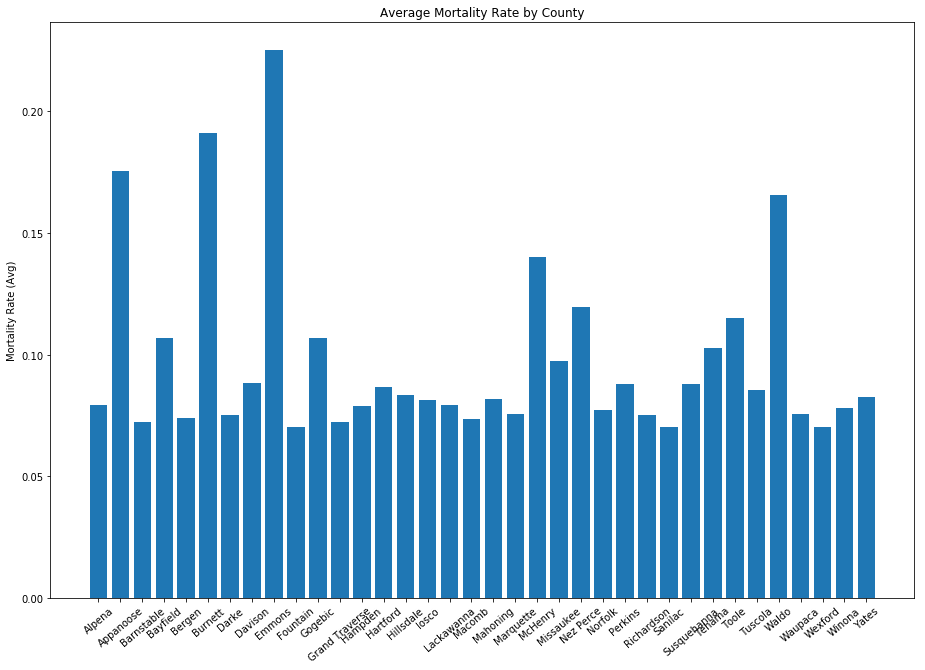

In [74]:
new = dict(df4['mortality'])
fig = plt.figure()
ax = fig.add_axes([0,0,2,2])
ax.bar(new.keys(),new.values())
plt.xticks(rotation = 40)
plt.title('Average Mortality Rate by County')
plt.ylabel('Mortality Rate (Avg)')
plt.show()

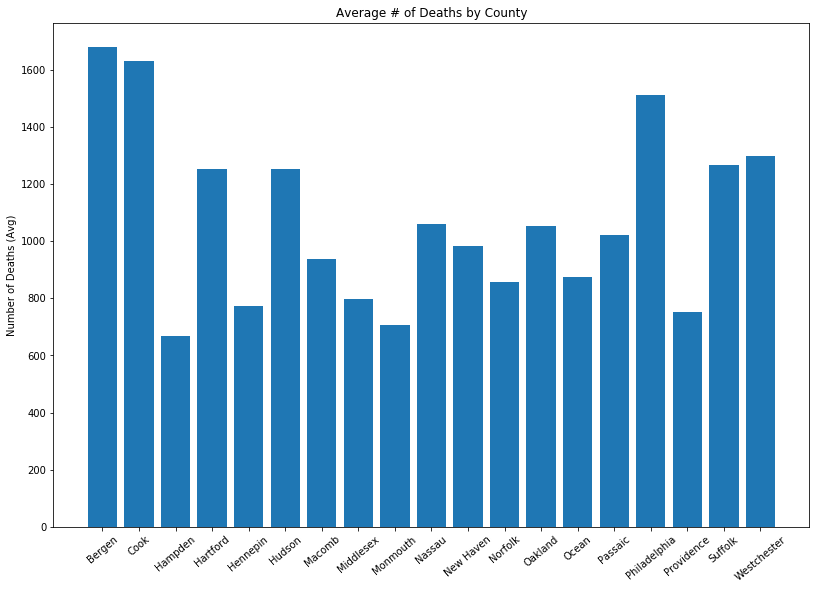

In [33]:
new = dict(df5['deaths'])
fig = plt.figure()
ax = fig.add_axes([0,0,1.75,1.75])
ax.bar(new.keys(),new.values())
plt.xticks(rotation = 40)
plt.title('Average # of Deaths by County')
plt.ylabel('Number of Deaths (Avg)')
plt.show()

In [76]:
#Make scatterplot of the average number of deaths per county by the average mortality rate to see if the variables relate 
#also a scatterplot of County by mortality rate and cases by mortality rate
#check covid and asthma + covid and air quality

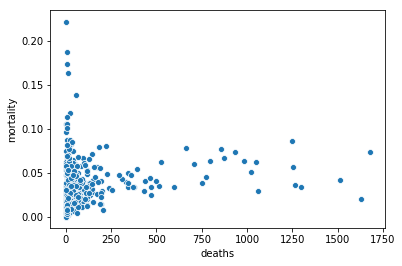

In [37]:
sns.scatterplot(x= df3['deaths'], y = df3['mortality']);

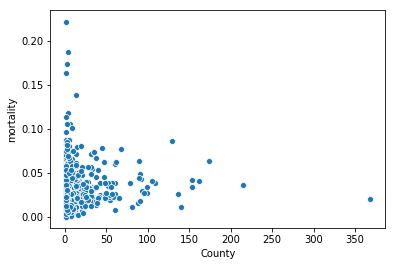

In [38]:
sns.scatterplot(x= df3['County'], y = df3['mortality']);

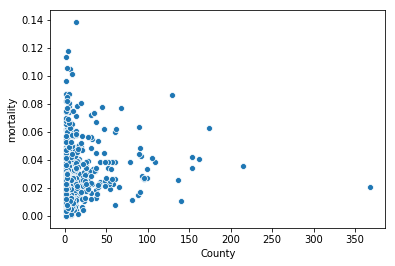

In [39]:
sns.scatterplot(x= low_rate['County'], y = low_rate['mortality']);

In [40]:
df3[df3['County'] == 368]

,fips,cases,deaths,mortality,Name of Facility,Full Address,Municipality,Owner Type,Daily Testing Capacity,Services Offered,State or Territory,County,Testing Start Date,Testing End Date,Kind of test,Processing location,Facility Type,x,y,county_states
county,,,,,,,,,,,,,,,,,,,,
Cook,18210.200913,53682.68379,1630.210046,0.020518,368.0,367.0,344.0,336.0,6.0,368.0,368.0,368.0,141.0,114.0,365.0,363.0,367.0,368.0,368.0,368.0


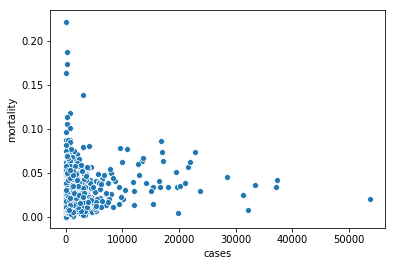

In [41]:
sns.scatterplot(x= df3['cases'], y = df3['mortality'])

In [5]:
maskmandate_df = pd.read_excel('mask_mandate.xlsx')
maskmandate_df_shaved = maskmandate_df.iloc[:,:6]
maskmandate_df_shaved['Population in with mask coverage']
maskmandate_df_shaved['percentage mask coverage'] = maskmandate_df_shaved['Population in with mask coverage']/maskmandate_df_shaved['Population - actual']
maskmandate_df_shaved


,State,Location,State Only/ Municipality/County,Date order in Effect,Population in with mask coverage,Population - actual,percentage mask coverage
0,Alabama,Alabama,State,2020-07-16,4903185.0,4903185,1.0
1,Alaska,Anchorage,Municipality,2020-06-29,288000.0,288000,1.0
2,Alaska,Juneau,Municipality,2020-07-20,31974.0,31974,1.0
3,Alaska,Cordova,Municipality,2020-04-23,2169.0,2169,1.0
4,Alaska,Dillingham,Municipality,2020-06-11,2360.0,2360,1.0
5,Alaska,Seward,Municipality,2020-07-01,2796.0,2796,1.0
6,Alaska,Unalaska,Municipality,2020-04-15,4432.0,4432,1.0
7,Alaska,Valdez,Municipality,2020-07-10,3855.0,3855,1.0
8,Alaska,Gustavus,Municipality,2020-07-13,447.0,447,1.0
9,Alaska,Kotzebue,Municipality,NaT,3246.0,3246,1.0


In [43]:
x = maskmandate_df[maskmandate_df['State Only/ Municipality/County'] == 'State']
x['percentage mask coverage'] = x['Population in with mask coverage']/x['Population - actual']
x['state'] = x['State']
x
#percentage column contains 1 and nans and we want to use this to overlap other charts so we can see how mask mandates affect other variables

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,State,Location,State Only/ Municipality/County,Date order in Effect,Population in with mask coverage,Population - actual,Unnamed: 6,State.1,Population,Pop. with mask coverage,Percent of population with order in effect,Cities with orders,Counties with orders,percentage mask coverage,state
0,Alabama,Alabama,State,2020-07-16,4903185.0,4903185,NaN,Alabama,4903185.0,4903185.0,1.0,NaN,NaN,1.0,Alabama
51,Arkansas,Arkansas,State,2020-07-20,3017804.0,3017804,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,Arkansas
52,California,California,State,2020-06-18,39512223.0,39512223,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,California
53,Colorado,Colorado,State,2020-07-17,5758736.0,5758736,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,Colorado
54,Connecticut,Connecticut,State,2020-04-20,3565287.0,3565287,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,Connecticut
55,Delaware,Delaware,State,2020-04-28,973764.0,973764,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,Delaware
168,Hawaii,Hawaii,State,2020-04-20,1415872.0,1415872,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,Hawaii
188,Illinois,Illinois,State,2020-05-01,12671821.0,12671821,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,Illinois
189,Indiana,Indiana,State,2020-07-27,6732219.0,6732219,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,Indiana
197,Kansas,Kansas,State,2020-07-03,2913314.0,2913314,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,Kansas


In [48]:
mask_testsite_mort = testing_sites_covid.merge(x,
    how='outer',
    on = 'state'
)
mask_testsite_mort

,date,county,state,fips,cases,deaths,mortality,Name of Facility,Full Address,Municipality,...,Population in with mask coverage,Population - actual,Unnamed: 6,State.1,Population,Pop. with mask coverage,Percent of population with order in effect,Cities with orders,Counties with orders,percentage mask coverage
0,2020-01-21,Snohomish,Washington,53061.0,1.0,0.0,0.000000,57.0,57.0,57.0,...,7614893.0,7614893.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
1,2020-01-22,Snohomish,Washington,53061.0,1.0,0.0,0.000000,57.0,57.0,57.0,...,7614893.0,7614893.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
2,2020-01-23,Snohomish,Washington,53061.0,1.0,0.0,0.000000,57.0,57.0,57.0,...,7614893.0,7614893.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
3,2020-01-24,Snohomish,Washington,53061.0,1.0,0.0,0.000000,57.0,57.0,57.0,...,7614893.0,7614893.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
4,2020-01-25,Snohomish,Washington,53061.0,1.0,0.0,0.000000,57.0,57.0,57.0,...,7614893.0,7614893.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
5,2020-01-26,Snohomish,Washington,53061.0,1.0,0.0,0.000000,57.0,57.0,57.0,...,7614893.0,7614893.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
6,2020-01-27,Snohomish,Washington,53061.0,1.0,0.0,0.000000,57.0,57.0,57.0,...,7614893.0,7614893.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
7,2020-01-28,Snohomish,Washington,53061.0,1.0,0.0,0.000000,57.0,57.0,57.0,...,7614893.0,7614893.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
8,2020-01-29,Snohomish,Washington,53061.0,1.0,0.0,0.000000,57.0,57.0,57.0,...,7614893.0,7614893.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
9,2020-01-30,Snohomish,Washington,53061.0,1.0,0.0,0.000000,57.0,57.0,57.0,...,7614893.0,7614893.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [3]:
asthma = pd.read_csv('500_Cities__Current_asthma_among_adults_aged___18_years.csv')
asthma['state'] = asthma['StateDesc']
asthma['asthma_value_times_count'] = (asthma['Data_Value'] * asthma['PopulationCount'])/100
asthma['asthma_value_times_count']
asthma1 = asthma.groupby(['state']).sum()
asthma_state_count = asthma1['asthma_value_times_count']

In [4]:
covid_asthma = pd.merge(asthma_state_count,Covid_data,
    how="left",                      
    left_on = ['state'],
    right_on = ['state'])
covid_asthma.groupby(['state']).mean()
#covid_asthma[covid_asthma['state']=='Arizona']['mortality']

NameError: name 'Covid_data' is not defined